## Assignment on Rosetta Stone of Human Capital

> Μακρυγιάννης Ιάσων - Σωτήριος  <br />
> 8160066  <br />
> Διοικητικής Επιστήμης και Τεχνολογίας  <br />

In this assignment we will read and analysize different tests ,on writing and reading skills , and tests on maths. <br />
The purpose of this study is to come with a way to facilitate conversion between test scores in different countries so we can compare different countries, as the authors call it "Rosetta Stone of Human Capital". <br />
The analysize will be in the same way as the authors did on their paper [A Rosetta Stone of Human Capital](https://www.cgdev.org/publication/rosetta-stone-human-capital).

*Before we begin I wanna apologize for my poor level of english,which Im currently on practise*

### Q1: Income and Test Results

* In this case we are gonna study the relashionship between income and the TIMSS and PIRLS score, as in Section 4.1 and Figure 5 of the original paper.
* First we are gonna the important libraries so we can handle and work on our data

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from plotnine import *
import scipy.stats.stats as stats

%matplotlib inline

* Now we are gonna load our first dataset which includes for each country the scores on reading-writing and on maths.The dataset however is on a *excel* file,but that won't be a problem since we can read excel files with Pandas.

In [2]:
country_scores = pd.read_excel('patel-sandefur-human-capital-final-results.xlsx', sheet_name='Country Scores')
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


* Moving on we need the income for each country.That we can get from *WDI_data.csv* which includes the GDP for each country

In [3]:
wdi_csv = pd.read_csv('DATA\WDI_data.csv',skipfooter=5,engine='python')
wdi_csv

,ï»¿Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


* Since there is a problem on column *Country Name* with some unknown symbols,we will rename this specific column

In [4]:
wdi_csv = wdi_csv.rename(columns={'ï»¿Country Name': 'Country Name'})
wdi_csv

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


* Our dataset seems to be including some datas which are not about GDP.We will clean column *Series Name* to keep only for GDP 

In [5]:
wdi_csv['Series Name'] = wdi_csv['Series Name'].str.split(',').str[0]
wdi_csv = wdi_csv.loc[wdi_csv['Series Name'] == 'GDP per capita']
wdi_csv

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,GDP per capita,NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,GDP per capita,NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,GDP per capita,NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,GDP per capita,NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,GDP per capita,NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
777,West Bank and Gaza,PSE,GDP per capita,NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,GDP per capita,NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,GDP per capita,NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,GDP per capita,NY.GDP.PCAP.PP.KD,3627.20204093772


* GDP is column *2015 [YR2015]* but the name is not very friendly,and also we can notice that some of our datas are not numbers.We will need to clean this specific column

In [6]:
wdi_csv.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
2015 [YR2015]    object
dtype: object

In [7]:
wdi_csv['2015 [YR2015]'] = wdi_csv['2015 [YR2015]'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna().astype(float)
wdi_csv = wdi_csv.rename(columns={'2015 [YR2015]': 'GDP_per_Capita'})
wdi_csv

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Name,Country Code,Series Name,Series Code,GDP_per_Capita
0,Afghanistan,AFG,GDP per capita,NY.GDP.PCAP.PP.KD,1809.016488
3,Albania,ALB,GDP per capita,NY.GDP.PCAP.PP.KD,10971.292517
6,Algeria,DZA,GDP per capita,NY.GDP.PCAP.PP.KD,13724.723853
9,American Samoa,ASM,GDP per capita,NY.GDP.PCAP.PP.KD,NaN
12,Andorra,AND,GDP per capita,NY.GDP.PCAP.PP.KD,NaN
...,...,...,...,...,...
777,West Bank and Gaza,PSE,GDP per capita,NY.GDP.PCAP.PP.KD,4339.103693
780,World,WLD,GDP per capita,NY.GDP.PCAP.PP.KD,14766.537606
783,"Yemen, Rep.",YEM,GDP per capita,NY.GDP.PCAP.PP.KD,2641.045829
786,Zambia,ZMB,GDP per capita,NY.GDP.PCAP.PP.KD,3627.202041


* We are gonna merge the dataframe which includes the score for each country with the dataset which includes the GDP per country so we can analyze them.


In [8]:
gdp_scores = pd.merge(wdi_csv,country_scores,on='Country Code',how='inner')
gdp_scores

,Country Name,Country Code,Series Name,Series Code,GDP_per_Capita,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,Argentina,ARG,GDP per capita,NY.GDP.PCAP.PP.KD,19101.297392,Argentina,51.000000,66.000000,406.652557,431.443542
1,Armenia,ARM,GDP per capita,NY.GDP.PCAP.PP.KD,8195.933650,Armenia,71.505402,NaN,454.000000,NaN
2,Australia,AUS,GDP per capita,NY.GDP.PCAP.PP.KD,43719.502165,Australia,90.000000,92.932800,520.000000,534.000000
3,Austria,AUT,GDP per capita,NY.GDP.PCAP.PP.KD,44353.875214,Austria,95.302193,97.104111,511.000000,533.000000
4,Azerbaijan,AZE,GDP per capita,NY.GDP.PCAP.PP.KD,16698.863653,Azerbaijan,72.284508,81.859566,465.000000,467.000000
...,...,...,...,...,...,...,...,...,...,...
73,Turkey,TUR,GDP per capita,NY.GDP.PCAP.PP.KD,23388.481302,Turkey,77.000000,NaN,477.000000,NaN
74,United Arab Emirates,ARE,GDP per capita,NY.GDP.PCAP.PP.KD,65975.375547,U.A.E.,64.000000,63.982311,437.000000,440.000000
75,United States,USA,GDP per capita,NY.GDP.PCAP.PP.KD,53029.293361,United States,96.000000,97.517357,544.000000,560.000000
76,Uruguay,URY,GDP per capita,NY.GDP.PCAP.PP.KD,19831.445894,Uruguay,57.000000,70.000000,424.912933,450.448608


* Now we need to change the GDP into a logged GDP,which allows us to visualize in a better way the GDPs

In [9]:
gdp_scores['GDP_per_Capita'] = np.log(gdp_scores['GDP_per_Capita'])

* We will also  rename the test scores on a more friendly name


In [10]:
gdp_scores = gdp_scores.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)': 'TIMMS', 'Median Reading Score (PIRLS Scale, 4th Grade)': 'PIRLS'})

* Now we can process on visualizing the scores and GDP.Since ggplot removes NaN's values,we won't move on deleting NaN's lines due time.

For *TIMMS* and *GDP per Capita*

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


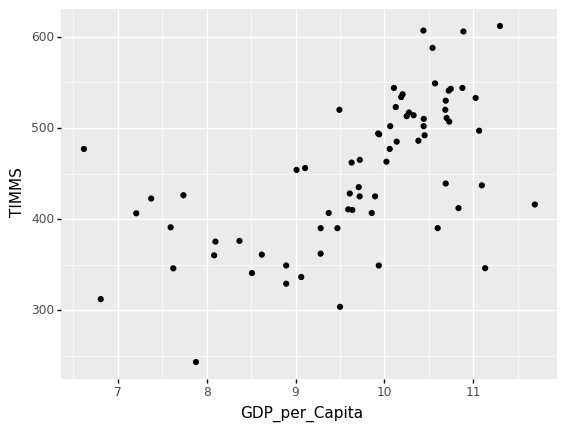

<ggplot: (-9223371880158828584)>

In [11]:
ggplot(data=gdp_scores) +\
    geom_point(mapping=aes(x='GDP_per_Capita', y='TIMMS')) 

For *PIRLS* and *GDP per Capita*

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


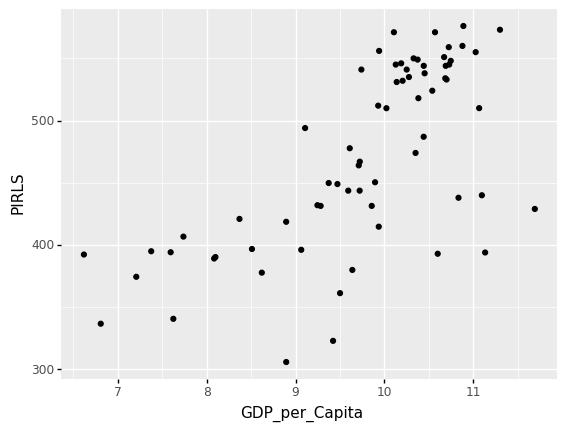

<ggplot: (-9223371880158825036)>

In [12]:
ggplot(data=gdp_scores) +\
    geom_point(mapping=aes(x='GDP_per_Capita', y='PIRLS')) 

* According to the study, the test scores and the income does not change statistically.
* They also noted that rich in oil countries had low levels on the test scores,meaning that the income of a country does not significally change the test score on each country. 
* We will also check this with regressions between the *GDP per Capita* and the test scores

Beginning with TIMMS and GDP per Capita:

In [13]:
gdp_timms = smf.ols("TIMMS ~ GDP_per_Capita", data=gdp_scores, missing='drop')
timms_res = gdp_timms.fit()
timms_res.params

Intercept         46.117041
GDP_per_Capita    41.745974
dtype: float64

In [14]:
timms_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMMS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        15:31:41   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         46.1170     66.734      0.691      0.492     -87.013     179.247
GDP_per_Capita    41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* What can we get from this model? <br >
    *  Seems like R-squared is low which means that our model doesn't fit well on our data.It seems that indeed there isn't any significal relashionship between *GDP per Capita* and on *TIMMS*
    * Since GDP has been logged,that means for every unit increase on GDP, there will be a increase on TIMMS by 41.76460.However since R-squared is low,seems like this isn't a working case
    * Also for every increase on GDP per capita,without being logged, TIMMS will be increased by $2^{41.7460}$.So that means that increasing GDP won't increase TIMMS score,it's incredible low,and it explains the low R-square
    
   
Working on PIRLS:

In [15]:
gdp_pirls = smf.ols("PIRLS ~ GDP_per_Capita", data=gdp_scores, missing='drop')
pirls_res = gdp_pirls.fit()
pirls_res.params

Intercept         42.619127
GDP_per_Capita    43.912415
dtype: float64

In [16]:
pirls_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        15:31:44   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         42.6191     57.790      0.737      0.463     -72.762     158.000
GDP_per_Capita    43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* What can we get from this model? 
    * R-squared seems to be better from *TIMMS* but however is still low.
    * Same as before, every unit increasing on logged GDP also increases PIRLS by 43.9124
    * Also without GDP being logged,every unit of GDP being increased wiill also increase PIRLS by $2^{43.9124}$.So that means that increasing GDP won't increase PIRLS score,it's incredible low,and it explains the low R-square
    

### Q2: Years of Schooling and Test Scores

* Moving we will see how much years of schooling impact test scores, taking account of the per capita income, as in Section 4.1 and Figure 6 of the original paper.
* To begin with,we will save the residuals from our models of  *Q1* which  contain what cannot be explained by income, so we can use them to see how much of what cannot be explained by income can be explained by years of schooling.

In [17]:
gdp_scores['timss_residuals'] = timms_res.resid
gdp_scores['pirls_residuals'] = pirls_res.resid

* We will now read `BL2013_MF1599_v2.2.dta` which shows us average years of schooling for each country.The file is a .dta extensions which means it's from *Stata*.However Pandas can also read these kind of files

In [18]:
avg_sch_year = pd.read_stata('DATA\BL2013_MF1599_v2.2.dta')
avg_sch_year

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,358.0,Ukraine,1990.0,MF,15.0,999.0,5.785368,14.138213,11.648808,59.848248,41.504124,20.228174,12.362464,9.531308,4.706372,4.173123,0.651813,40770.0,UKR,Europe and Central Asia
1894,358.0,Ukraine,1995.0,MF,15.0,999.0,4.284995,10.039333,8.426095,58.694180,40.753365,26.981485,16.553701,10.154778,4.886407,4.397667,0.870704,40989.0,UKR,Europe and Central Asia
1895,358.0,Ukraine,2000.0,MF,15.0,999.0,2.861569,9.811013,7.551663,53.745895,36.992371,33.192432,20.433352,10.453713,4.977168,4.404029,1.072516,40332.0,UKR,Europe and Central Asia
1896,358.0,Ukraine,2005.0,MF,15.0,999.0,1.898582,6.847359,5.919780,54.743999,39.278564,36.510059,22.327957,10.967577,5.042674,4.748143,1.176760,39573.0,UKR,Europe and Central Asia


* We will also keep the datas for the year 2010 , same way as authors did

In [19]:
avg_sch_year = avg_sch_year.loc[avg_sch_year['year'] == 2010]
avg_sch_year

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


 * Since we need to merge this dataset with our *country scores* dataset we will rename *WBcode* into *Country Code* so we can merge them

In [20]:
avg_sch_year = avg_sch_year.rename(columns={'WBcode': 'Country Code'})

* Also we will keep specific columns

In [21]:
avg_sch_year = avg_sch_year[['yr_sch','Country Code']]
avg_sch_year

,yr_sch,Country Code
12,6.678049,DZA
25,4.430164,BEN
38,9.554915,BWA
51,3.346481,BDI
64,6.154877,CMR
...,...,...
1845,10.404020,ROM
1858,10.845333,SER
1871,11.890487,SVN
1884,8.543072,MAC


* Moving on with mergine *avg_sch_year* with *gdp_scores*

In [22]:
gdp_avg_scores_df = pd.merge(gdp_scores,avg_sch_year,on='Country Code',how='inner')
gdp_avg_scores_df

,Country Name,Country Code,Series Name,Series Code,GDP_per_Capita,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMMS,PIRLS,timss_residuals,pirls_residuals,yr_sch
0,Argentina,ARG,GDP per capita,NY.GDP.PCAP.PP.KD,9.857512,Argentina,51.000000,66.000000,406.652557,431.443542,-50.975909,-44.042720,9.510379
1,Armenia,ARM,GDP per capita,NY.GDP.PCAP.PP.KD,9.011393,Armenia,71.505402,NaN,454.000000,NaN,31.693559,NaN,10.726531
2,Australia,AUS,GDP per capita,NY.GDP.PCAP.PP.KD,10.685550,Australia,90.000000,92.932800,520.000000,534.000000,27.804280,22.152588,11.541207
3,Austria,AUT,GDP per capita,NY.GDP.PCAP.PP.KD,10.699955,Austria,95.302193,97.104111,511.000000,533.000000,18.202895,20.519995,9.603404
4,Bahrain,BHR,GDP per capita,NY.GDP.PCAP.PP.KD,10.690272,Bahrain,67.000000,NaN,439.000000,NaN,-53.392883,NaN,7.060835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Turkey,TUR,GDP per capita,NY.GDP.PCAP.PP.KD,10.059999,Turkey,77.000000,NaN,477.000000,NaN,10.918500,NaN,7.050123
68,United Arab Emirates,ARE,GDP per capita,NY.GDP.PCAP.PP.KD,11.097037,U.A.E.,64.000000,63.982311,437.000000,440.000000,-72.373659,-89.916813,9.066772
69,United States,USA,GDP per capita,NY.GDP.PCAP.PP.KD,10.878600,United States,96.000000,97.517357,544.000000,560.000000,43.745211,39.675288,13.182642
70,Uruguay,URY,GDP per capita,NY.GDP.PCAP.PP.KD,9.895024,Uruguay,57.000000,70.000000,424.912933,450.448608,-34.281533,-26.684923,8.171520


* We will now do a regression between *yr_sch* and *GDP_per_Capita* to see the relashionship between these two and also get the residuals which describe the years of schooling that cannot be explained by income.We wont remove NaN,since the OLS model drops them.

In [23]:
yr_gdp = smf.ols("yr_sch ~ GDP_per_Capita", data=gdp_avg_scores_df)
yr_gdp_res = yr_gdp.fit()
yr_gdp_res.params

Intercept        -10.130974
GDP_per_Capita     1.959388
dtype: float64

In [24]:
yr_gdp_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           4.74e-16
Time:                        15:31:58   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.1310      1.838     -5.512      0.000     -13.797      -6.465
GDP_per_Capita     1.9594      0.186     10.515      0.000       1.588       2.331
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.855
Skew:                          -0.724   Prob(JB):                       0.0197
Kurtosis:                       3.723   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Our model seems to be fitting quite well with a R-Squared 0.612
* According to this model for each increased unit on GDP_per_Capita, years of schooling is increased by 1.9594
* Also because GDP per capita without being logged,will result to that for every unit increasing of GDP_per_capita will also increase years of schooling by $2^{1.9594}$

Moving on we will also save the residuals from our current model which describes the years of schooling that cannot be explained by income

In [25]:
gdp_avg_scores_df['income_yr_residuals'] = yr_gdp_res.resid


The results of this  visualised is:

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


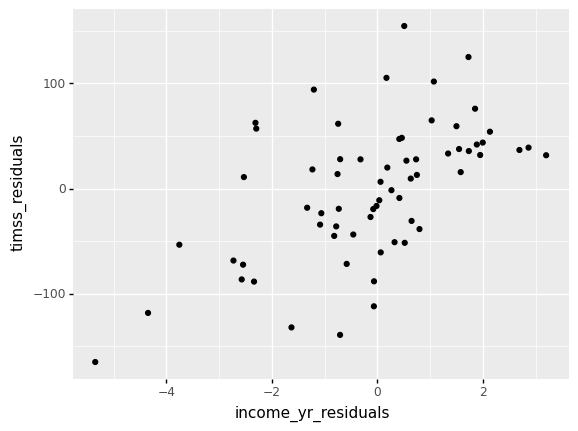

<ggplot: (-9223371880158856340)>

In [26]:
ggplot(data=gdp_avg_scores_df) +\
    geom_point(mapping=aes(x='income_yr_residuals', y='timss_residuals')) 

c:\users\jason\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


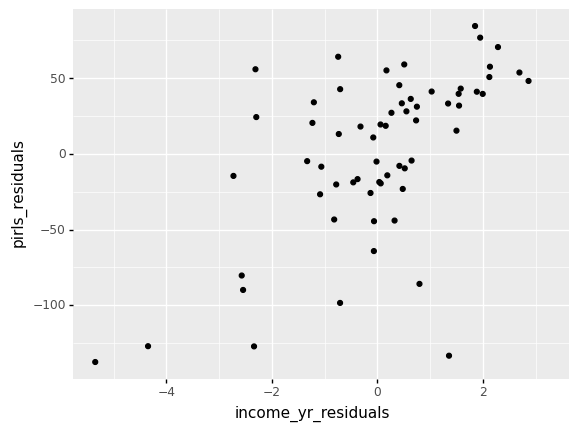

<ggplot: (-9223371880158863984)>

In [27]:
ggplot(data=gdp_avg_scores_df) +\
    geom_point(mapping=aes(x='income_yr_residuals', y='pirls_residuals')) 

* We will also run a regression between PIRLS residuals and inyear income residuals and with TIMMS residuals and year income residuals

In [28]:
yr_pirls = smf.ols("pirls_residuals ~ income_yr_residuals", data=gdp_avg_scores_df)
yr_pirls_res = yr_pirls.fit()
yr_pirls_res.params

Intercept               0.694772
income_yr_residuals    20.253116
dtype: float64

In [29]:
yr_pirls_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        pirls_residuals   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.96
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.27e-07
Time:                        15:32:21   Log-Likelihood:                -326.38
No. Observations:                  63   AIC:                             656.8
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6948      5.509      0.126      0.900     -10.320      11.710
income_yr_residuals    20.2531      3.475      5.828      0.000      13.304      27.202
==============================================================================
Omnibus:                       14.661   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.484
Skew:                          -0.843   Prob(JB):                     2.16e-05
Kurtosis:                       5.311   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
yr_timms = smf.ols("timss_residuals ~ income_yr_residuals", data=gdp_avg_scores_df)
yr_timms_res = yr_timms.fit()
yr_timms_res.params

Intercept               1.415540
income_yr_residuals    21.585637
dtype: float64

In [31]:
yr_timms_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        timss_residuals   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     29.30
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           1.03e-06
Time:                        15:32:23   Log-Likelihood:                -350.69
No. Observations:                  65   AIC:                             705.4
Df Residuals:                      63   BIC:                             709.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4155      6.734      0.210      0.834     -12.041      14.872
income_yr_residuals    21.5856      3.988      5.413      0.000      13.617      29.554
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.934
Skew:                           0.370   Prob(JB):                        0.380
Kurtosis:                       3.407   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q3: Compare New and Previous Estimates

* Moving on we are gonna study about the results of authors comparing their scales with other estimates of learning outcomes, as in Section 4.1 and Figure 7 of the original paper.

* To begin with we are gonna make two different subdatasets of country scores to eliminate the *NaN* for TIMMS and PIRLS

In [32]:
country_scores_pirls = country_scores.copy()
country_scores_pirls = country_scores_pirls[country_scores_pirls['Percent Above Reading Benchmark (400 on PIRLS Scale)'].notna()]
country_scores_timms = country_scores.copy()
country_scores_timms = country_scores_timms[country_scores_timms['Percent Above Math Benchmark (400 on TIMSS Scale)'].notna()]

* After creating our subdatasets we will now read `HLO Panel Data (mean, thresh) - Jan 2018.dta` which contains learning outcome estimates from the World Bank


In [33]:
wbdatas = pd.read_stata('DATA\HLO Panel Data (mean, thresh) - Jan 2018.dta')
wbdatas

,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN
...,...,...,...,...,...,...
1844,Zimbabwe,716,ZWE,1995,NaN,NaN
1845,Zimbabwe,716,ZWE,2000,NaN,NaN
1846,Zimbabwe,716,ZWE,2005,342.98999,48.27
1847,Zimbabwe,716,ZWE,2010,NaN,NaN


* From a quick look ,it seems that *low_threshold* ,which is the percentage of subjects above the 400 mark, has some *NaN*.We will proceed by clearing them out

In [34]:
wbdatas = wbdatas[wbdatas['low_threshold'].notna()]

* After that we need to keep the latest data for each country.To do that we will first sort them and then keep the latest one

In [35]:
sorted = wbdatas.sort_values(by='year')
result = sorted.drop_duplicates('country', keep='last')
result

,country,idcntry,cntabb,year,HLO,low_threshold
302,"Canada, Nova Scotia",9136,CNS,1990,468.440002,82.599998
182,Bolivia Plurinational State of,68,BOL,1995,370.399994,53.610001
149,Belgium French,5601,BFR,1995,500.390015,93.320000
1247,Nigeria,566,NGA,1995,241.179993,45.020000
941,Liberia,430,LBR,2000,273.709991,37.900002
...,...,...,...,...,...,...
812,Italy,380,ITA,2015,500.750000,91.510002
823,Japan,392,JPN,2015,590.890015,98.129997
845,Kazakhstan,398,KAZ,2015,536.109985,93.000000
504,Denmark,208,DNK,2015,534.179993,93.330002


* Since we will be merging with *country_scores_pirls* dataset and *country_scores_timms* we will rename *cntabb* to *Country Code* to be enable to merge them sucessful

In [36]:
result = result.rename(columns={'cntabb': 'Country Code'})

* Now we will proceed with the merging

In [37]:
country_scores_pirls = pd.merge(country_scores_pirls,result,on='Country Code',how='inner')
country_scores_timms = pd.merge(country_scores_timms,result,on='Country Code',how='inner')

* We will rename *low_threshold* into *World Bank Estimates* for a clearer graph

In [38]:
country_scores_pirls = country_scores_pirls.rename(columns={'low_threshold': 'World Bank Estimates'})
country_scores_timms = country_scores_timms.rename(columns={'low_threshold': 'World Bank Estimates'})

* To be able to visualize points as Countrie's name we will use *geom_text* which allows us to use Text labels instead of regular points

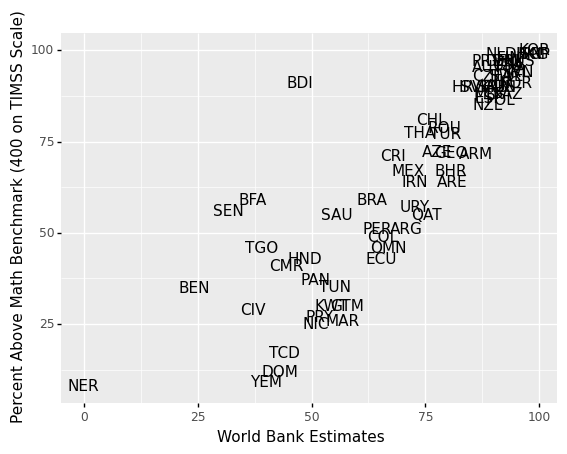

<ggplot: (-9223371880158620428)>

In [39]:
ggplot(data=country_scores_timms) +\
    geom_text(mapping=aes(x='World Bank Estimates', y='Percent Above Math Benchmark (400 on TIMSS Scale)',label='Country Code'))

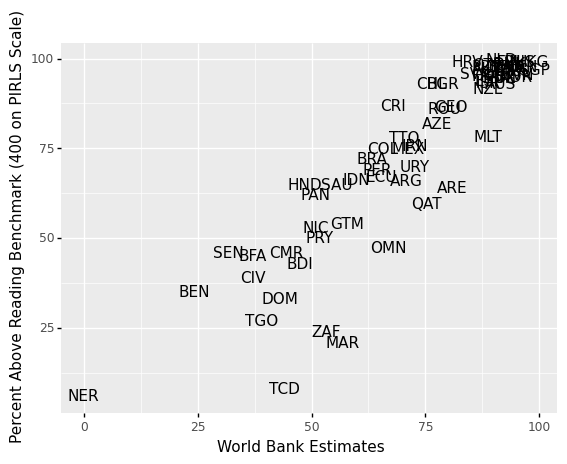

<ggplot: (-9223371880158576484)>

In [40]:
ggplot(data=country_scores_pirls) +\
    geom_text(mapping=aes(x='World Bank Estimates', y='Percent Above Reading Benchmark (400 on PIRLS Scale)',label='Country Code'))

* Now can see use *Spearsman* Correlation to see the if the measures of authors are similar with the *World Bank Estimates*

First we do for PIRLS:

In [41]:
stats.spearmanr(country_scores_pirls['World Bank Estimates'], country_scores_pirls['Percent Above Reading Benchmark (400 on PIRLS Scale)'])

SpearmanrResult(correlation=0.9045173418249431, pvalue=5.2905847721937165e-25)

And the we will proceed for TIMSS

In [42]:
stats.spearmanr(country_scores_timms['World Bank Estimates'], country_scores_timms['Percent Above Math Benchmark (400 on TIMSS Scale)'])

SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)

* For both TIMMS and PIRLS there seems to be a good correlation with the World Bank Estimates,at 0.90 which tells us that there is a good strength of a link between two sets of data.

### Q4: Skills Intensity

* Moving on the last step we will now  study the relationship between the skills of the people in each country and the value of its exports, as described in the original paper. We will do this by perfoming 4 regressions:

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$


* First we are gonna read the dataset *usa_00001.csv* which contains informations such as education of the employees with its weight(PERWT) which we will need.


In [43]:
usa_csv = pd.read_csv('usa_00001.csv')
usa_csv

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371614,2000,200004,157985,600.0,2000001579854,12,1,3,494.0,1,10,0,0,9920,0
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337
371616,2000,200004,157986,600.0,2000001579864,6,1,2,600.0,6,65,1,10,130,759


* After that we will split this dataset into subdatasets for colleges employees ,with the rule that they at least 10 years of education, and for high school graduates with the rule that they have at least 6 years of education

In [44]:
usa_colleges = usa_csv.loc[usa_csv['EDUC'] >= 10]
usa_high = usa_csv.loc[(usa_csv['EDUC'] >=6) & (usa_csv['EDUC'] <10)]

* Moving on we will calculate the total employees for each industry using *PERWT* variable which shows how many persons in the US population are represented by a given person in the data. 

In [45]:
df_all_emply = usa_csv.groupby('IND',as_index=False)['PERWT'].sum()
df_all_emply

,IND,PERWT
0,0,108371644.0
1,17,1391515.0
2,18,723084.0
3,19,32080.0
4,27,147320.0
...,...,...
261,977,96866.0
262,978,27502.0
263,979,45195.0
264,987,37237.0


* Now we need to calculate the skill intensity for each industry on college graduates and high school graduates

In [46]:
df_high_empy = usa_high.groupby('IND',as_index=False)['PERWT'].sum()
df_high_empy = df_high_empy.rename(columns={'PERWT': "num_high" })
df_colleges_empy = usa_colleges.groupby('IND',as_index=False)['PERWT'].sum()
df_colleges_empy = df_colleges_empy.rename(columns={'PERWT': "num_colleges" })

* We will merge college's weight with high's school weight 

In [47]:
df_skills = pd.merge(df_high_empy,df_colleges_empy,on='IND',how='outer')
df_skills

,IND,num_high,num_colleges
0,0,23197023.0,5117532.0
1,17,673515.0,133389.0
2,18,445599.0,70935.0
3,19,19550.0,10095.0
4,27,105065.0,7917.0
...,...,...,...
261,977,76635.0,19135.0
262,978,19440.0,5411.0
263,979,29667.0,14043.0
264,987,27284.0,8663.0


* And now we will merge *df_skills* with *df_all_emply* to calculate the weights for each industry on high school and college

In [48]:
df_all_emply = pd.merge(df_all_emply,df_skills,how='inner',on='IND')
df_all_emply

,IND,PERWT,num_high,num_colleges
0,0,108371644.0,23197023.0,5117532.0
1,17,1391515.0,673515.0,133389.0
2,18,723084.0,445599.0,70935.0
3,19,32080.0,19550.0,10095.0
4,27,147320.0,105065.0,7917.0
...,...,...,...,...
261,977,96866.0,76635.0,19135.0
262,978,27502.0,19440.0,5411.0
263,979,45195.0,29667.0,14043.0
264,987,37237.0,27284.0,8663.0


* And now to calculate the weights we will divide the number of high school employees with PERWT(which is the sum of employees).Same goes for college employees

In [49]:
df_all_emply['weight_colleges'] = df_all_emply['num_colleges']/df_all_emply['PERWT']
df_all_emply['weight_high'] = df_all_emply['num_high']/df_all_emply['PERWT']

* We will keep important only columns to have a clearer dataset and also rename *IND* column to *ind2000* which we will need to do it after.

In [50]:
skills_intensity_industry = df_all_emply[['IND','weight_colleges','weight_high']]
skills_intensity_industry = skills_intensity_industry.rename(columns={'IND': "ind2000" })
skills_intensity_industry

,ind2000,weight_colleges,weight_high
0,0,0.047222,0.214051
1,17,0.095859,0.484016
2,18,0.098101,0.616248
3,19,0.314682,0.609414
4,27,0.053740,0.713175
...,...,...,...
261,977,0.197541,0.791144
262,978,0.196749,0.706858
263,979,0.310720,0.656422
264,987,0.232645,0.732712


* These datas are from 2000.The industry codes of 1990 are not the same with 2000.
* We will use *cw_ind2000_ind1990ddx.dta* which file maps the industry codes of 2000 to those of 1990,to reweight the weighted averages in *skills_intensity_industry*. First we will read our dataset

In [51]:
cw_ind2000 = pd.read_stata('DATA\cw_ind2000_ind1990ddx.dta')
cw_ind2000

,ind2000,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907
...,...,...,...
707,957,922,0.009144
708,957,931,0.983767
709,959,700,0.038986
710,959,910,0.041877


* We need to merge *skills_intensity_industry* with *cw_ind2000* so we can apply the weights on weighted averages

In [52]:
skills_intensity_industry = pd.merge(cw_ind2000,skills_intensity_industry,on='ind2000',how='inner')
skills_intensity_industry

,ind2000,ind1990ddx,weight,weight_colleges,weight_high
0,17,10,0.994016,0.095859,0.484016
1,17,31,0.002637,0.095859,0.484016
2,17,121,0.001740,0.095859,0.484016
3,17,561,0.001607,0.095859,0.484016
4,18,11,0.990907,0.098101,0.616248
...,...,...,...,...,...
707,957,922,0.009144,0.377846,0.577053
708,957,931,0.983767,0.377846,0.577053
709,959,700,0.038986,0.326841,0.658283
710,959,910,0.041877,0.326841,0.658283


* To reweight the skill intensity for each industry we need to find the weight averages ,applying the *weight* of *ind1990ddx*

In [53]:
def weighted_average_college(group): # credits to Martin Alexandersson - stackoverflow for the function
   weights = group['weight']
   skills = group['weight_colleges']   
   return np.average(skills,weights=weights)

def weighted_average_high(group): # credits to Martin Alexandersson - stackoverflow for the function
   weights = group['weight']
   skills = group['weight_high']   
   return np.average(skills,weights=weights)

usa_csv_high_weight =skills_intensity_industry.groupby(['ind1990ddx'],as_index=False).apply(func = weighted_average_high)
usa_csv_high_weight = usa_csv_high_weight.rename(columns={usa_csv_high_weight.columns[1]: "high_weight" })
usa_csv_college_weight =skills_intensity_industry.groupby(['ind1990ddx'],as_index=False).apply(func = weighted_average_college)
usa_csv_college_weight = usa_csv_college_weight.rename(columns={usa_csv_college_weight.columns[1]: 'college_weight'})

* We will merge *usa_csv_high_weight* and *usa_csv_college_weight* to get our final skill intensity for each industry of 1990.
* Each dataset includes the reweighted skill intensity for each industry by using the given weight


In [54]:
skills_intensity_industry = pd.merge(usa_csv_high_weight,usa_csv_college_weight,on='ind1990ddx',how='inner')
skills_intensity_industry

,ind1990ddx,high_weight,college_weight
0,10,0.492160,0.112103
1,11,0.616248,0.098101
2,20,0.558740,0.215322
3,31,0.593570,0.288329
4,32,0.454429,0.168029
...,...,...,...
217,921,0.639713,0.350704
218,922,0.512204,0.448058
219,930,0.447343,0.517643
220,931,0.570984,0.382556


* After finding the skill intensity , we need the exports of different countries in 2018 for different industry.These informations are available on *BACI_HS17_Y2018_V202001.csv* which we will read.

In [55]:
baci = pd.read_csv('BACI_HS17_Y2018_V202001.csv')
baci

,t,i,j,k,v,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


* Now we need to map HS 6-digit code,which is *k* variable, to the industry codes we are using.To do that first we will be mapping HS 6-digit code with SIC87 industry code,using *cw_hs6_sic87dd.dta* dataset.

In [56]:
cw_ind2000 = pd.read_stata('DATA\cw_hs6_sic87dd.dta')
cw_ind2000

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.000000,no weights needed
1,10111.0,272.0,1.000000,no weights needed
2,10119.0,272.0,1.000000,no weights needed
3,10120.0,272.0,1.000000,no weights needed
4,10190.0,272.0,1.000000,no weights needed
...,...,...,...,...
6747,640419.0,NaN,0.084449,trade-based allocated 314X imports
6748,640420.0,NaN,0.012955,trade-based allocated 314X imports
6749,640510.0,NaN,0.121528,trade-based allocated 314X imports
6750,640520.0,NaN,0.192258,trade-based allocated 314X imports


* Since variable *k* is HS 6-digit code , we will rename it to *hs6* so we can map it with *cw_ind2000*.

In [57]:
baci = baci.rename(columns={'k': "hs6" })

* Moving on merging

In [58]:
exporter_stepone = pd.merge(cw_ind2000,baci,on='hs6',how='inner')

* We will adjust the trade flow of the BACI file with the *share* column of *cw_hs6_sic87dd.dta*.

In [59]:
exporter_stepone['adjusted'] = exporter_stepone['v'] * exporter_stepone['share']

* And now we will groupby *sic87dd* and *i* (country) to get the total value per exporter and industry.

In [60]:
exporter_stepone = exporter_stepone.groupby(['sic87dd','i'],as_index=False)['adjusted'].sum()
exporter_stepone

,sic87dd,i,adjusted
0,112.0,31,8.024000
1,112.0,32,1348.391771
2,112.0,36,466.484000
3,112.0,40,149.945440
4,112.0,48,87.404000
...,...,...,...
67623,9900.0,854,1.367014
67624,9900.0,858,68292.376958
67625,9900.0,860,388.753000
67626,9900.0,862,42769.604000


* Moving on we have to map the SIC87 industry codes to the 1990 census industry codes. This can be done using *cw_sic87_ind1990ddx.dta*.

In [61]:
cw_sic87ind = pd.read_stata('DATA\cw_sic87_ind1990ddx.dta')
cw_sic87ind = cw_sic87ind.rename(columns={'sic87': "sic87dd" })
cw_sic87ind

,ind1990ddx,sic87dd
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119
...,...,...
999,931,9641
1000,931,9651
1001,931,9661
1002,932,9711


* Moving on mapping 

In [62]:
exporter_stepone = pd.merge(cw_sic87ind,exporter_stepone,on='sic87dd',how='inner')
exporter_stepone

,ind1990ddx,sic87dd,i,adjusted
0,10,112,31,8.024000
1,10,112,32,1348.391771
2,10,112,36,466.484000
3,10,112,40,149.945440
4,10,112,48,87.404000
...,...,...,...,...
67047,390,3999,860,1556.644573
67048,390,3999,862,293.485894
67049,390,3999,882,268.716940
67050,390,3999,887,3.891072


* Since the exporter countries are given with the ISO 3-digit country codes, we will use *country_codes_V202001.csv* to map ISO 3-digit codes with three letter country code that is used in the rest of our data.
First we will be reading our data and change *country_code* column to *i* so we can do the mapping

In [63]:
country_codes = pd.read_csv('country_codes_V202001.csv',encoding='latin-1')
country_codes = country_codes.rename(columns={'country_code': "i" })

* Now we can move on mapping 3-digit country codes with three letter country code.

In [64]:
exporter = pd.merge(country_codes,exporter_stepone,on='i',how='inner')
exporter

,i,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha,ind1990ddx,sic87dd,adjusted
0,4,Afghanistan,Afghanistan,AF,AFG,10,119,68290.428330
1,4,Afghanistan,Afghanistan,AF,AFG,10,131,39698.892614
2,4,Afghanistan,Afghanistan,AF,AFG,10,132,43.993665
3,4,Afghanistan,Afghanistan,AF,AFG,10,134,380.462682
4,4,Afghanistan,Afghanistan,AF,AFG,10,139,13308.065785
...,...,...,...,...,...,...,...,...
67047,894,Zambia,Zambia,ZM,ZMB,390,3965,1.555000
67048,894,Zambia,Zambia,ZM,ZMB,390,3991,129.207919
67049,894,Zambia,Zambia,ZM,ZMB,390,3993,4.678000
67050,894,Zambia,Zambia,ZM,ZMB,390,3996,1.893083


* We will clear our dataframe by deleting some unecessary columns.

In [65]:
exporter = exporter[['i','iso_3digit_alpha','ind1990ddx','adjusted','sic87dd']]
exporter

,i,iso_3digit_alpha,ind1990ddx,adjusted,sic87dd
0,4,AFG,10,68290.428330,119
1,4,AFG,10,39698.892614,131
2,4,AFG,10,43.993665,132
3,4,AFG,10,380.462682,134
4,4,AFG,10,13308.065785,139
...,...,...,...,...,...
67047,894,ZMB,390,1.555000,3965
67048,894,ZMB,390,129.207919,3991
67049,894,ZMB,390,4.678000,3993
67050,894,ZMB,390,1.893083,3996


* Moving on we can merge *exporter* dataframe with skill intensity dataframe

In [66]:
exporter = pd.merge(exporter,skills_intensity_industry,on='ind1990ddx')
exporter

,i,iso_3digit_alpha,ind1990ddx,adjusted,sic87dd,high_weight,college_weight
0,4,AFG,10,68290.428330,119,0.492160,0.112103
1,4,AFG,10,39698.892614,131,0.492160,0.112103
2,4,AFG,10,43.993665,132,0.492160,0.112103
3,4,AFG,10,380.462682,134,0.492160,0.112103
4,4,AFG,10,13308.065785,139,0.492160,0.112103
...,...,...,...,...,...,...,...
67047,818,EGY,362,4390.530260,3764,0.469072,0.499685
67048,826,GBR,362,137409.188156,3761,0.469072,0.499685
67049,826,GBR,362,15463.620537,3764,0.469072,0.499685
67050,842,USA,362,86683.400388,3761,0.469072,0.499685


* And closing on we will merge *exporter* with *country_scores*. We will make a copy of *country_scores* and change *Country Code* column to *iso_3digit_alpha* to be able to merge.

In [67]:
country_score_copy = country_scores.copy()
country_score_copy = country_score_copy.rename(columns={'Country Code': "iso_3digit_alpha" })

* And now moving on merging.

In [68]:
exporter_final = pd.merge(exporter,country_score_copy,on='iso_3digit_alpha',how='inner')

* Last thing we will rename the column which includes PIRLS and TIMSS score to a more friendly name and we will divide them by 1000, so we can read them better.

In [69]:
exporter_final = exporter_final.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)': "timss", 'Median Reading Score (PIRLS Scale, 4th Grade)':'pirls'})
exporter_final['timss'] = exporter_final['timss'].apply(lambda x: x/1000)
exporter_final['pirls'] = exporter_final['pirls'].apply(lambda x: x/1000)

* Now we are final dataset we are able to run our regressions.
* We will run the first regression with TIMSS & college.
* Since industry and country are *categorical* variables , we will use *C* function to define them as categoricals.Else the regression will be run as simple integers.

In [70]:
export_timss_college = smf.ols("np.log(adjusted) ~ timss:college_weight + C(ind1990ddx) + C(i)", data=exporter_final)
export_timss_college_res = export_timss_college.fit()
export_timss_college_res.params

Intercept                3.496094
C(ind1990ddx)[T.11]     -2.573287
C(ind1990ddx)[T.31]     -1.262233
C(ind1990ddx)[T.32]     -1.171492
C(ind1990ddx)[T.40]     -1.291502
                          ...    
C(i)[T.842]              7.915497
C(i)[T.854]             -2.454258
C(i)[T.858]              1.043882
C(i)[T.887]             -1.631670
timss:college_weight    25.488460
Length: 159, dtype: float64

In [71]:
export_timss_college_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(adjusted)   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     281.4
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:33:54   Log-Likelihood:                -62983.
No. Observations:               27490   AIC:                         1.263e+05
Df Residuals:                   27338   BIC:                         1.275e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4961      0.182     19.232      0.000       3.140       3.852
C(ind1990ddx)[T.11]     -2.5733      0.135    -19.125      0.000      -2.837      -2.310
C(ind1990ddx)[T.31]     -1.2622      0.344     -3.670      0.000      -1.936      -0.588
C(ind1990ddx)[T.32]     -1.1715      0.200     -5.870      0.000      -1.563      -0.780
C(ind1990ddx)[T.40]     -1.2915      0.151     -8.567      0.000      -1.587      -0.996
C(ind1990ddx)[T.41]     -0.7931      0.281     -2.823      0.005      -1.344      -0.242
C(ind1990ddx)[T.42]      2.3451      0.278      8.424      0.000       1.799       2.891
C(ind1990ddx)[T.50]     -0.4502      0.138     -3.260      0.001      -0.721      -0.180
C(ind1990ddx)[T.100]     3.2723      0.230     14.221      0.000       2.821       3.723
C(ind1990ddx)[T.101]     1.0495      0.156      6.738      0.000       0.744       1.355
C(ind1990ddx)[T.102]     1.4411      0.150      9.583      0.000       1.146       1.736
C(ind1990ddx)[T.110]    -0.2298      0.149     -1.542      0.123      -0.522       0.062
C(ind1990ddx)[T.111]     1.7212      0.301      5.715      0.000       1.131       2.311
C(ind1990ddx)[T.112]     1.3303      0.152      8.739      0.000       1.032       1.629
C(ind1990ddx)[T.120]    -0.6426      0.170     -3.775      0.000      -0.976      -0.309
C(ind1990ddx)[T.121]     0.3508      0.118      2.976      0.003       0.120       0.582
C(ind1990ddx)[T.130]    -1.6785      0.192     -8.742      0.000      -2.055      -1.302
C(ind1990ddx)[T.132]    -1.5385      0.179     -8.572      0.000      -1.890      -1.187
C(ind1990ddx)[T.141]    -0.8413      0.312     -2.699      0.007      -1.452      -0.230
C(ind1990ddx)[T.142]     0.5832      0.150      3.897      0.000       0.290       0.876
C(ind1990ddx)[T.150]    -0.3965      0.153     -2.594      0.009      -0.696      -0.097
C(ind1990ddx)[T.151]    -0.3475      0.103     -3.390      0.001      -0.548      -0.147
C(ind1990ddx)[T.152]    -0.7868      0.136     -5.770      0.000      -1.054      -0.519
C(ind1990ddx)[T.160]     1.2217      0.231      5.280      0.000       0.768       1.675
C(ind1990ddx)[T.161]    -0.9914      0.134     -7.420      0.000      -1.253      -0.730
C(ind1990ddx)[T.162]    -0.7544      0.160     -4.726      0.000      -1.067      -0.442
C(ind1990ddx)[T.171]    -6.0840      0.355    -17.154      0.000      -6.779      -5.389
C(ind1990ddx)[T.172]    -4.5538      0.270    -16.887      0.000      -5.082      -4.025
C(ind1990ddx)[T.180]    -0.5189      0.198     -2.626      0.009      -0.906      -0.132
C(ind1990ddx)[T.181]    -2.9659      0.411     -7.208      0.000      -3.772      -2.159
C(ind1990ddx)[T.182]    -0.1684      0.206     -0.817      0.414      -0.572       0.236
C(ind1990ddx)[T.190]     0.6525      0.322      2.028    

* Moving on running regression with PIRLS & college weights 

In [72]:
export_pirls_college = smf.ols("np.log(adjusted) ~ pirls:college_weight + C(ind1990ddx) + C(i)", data=exporter_final)
export_pirls_college_res = export_timss_college.fit()
export_pirls_college_res.params

Intercept                3.496094
C(ind1990ddx)[T.11]     -2.573287
C(ind1990ddx)[T.31]     -1.262233
C(ind1990ddx)[T.32]     -1.171492
C(ind1990ddx)[T.40]     -1.291502
                          ...    
C(i)[T.842]              7.915497
C(i)[T.854]             -2.454258
C(i)[T.858]              1.043882
C(i)[T.887]             -1.631670
timss:college_weight    25.488460
Length: 159, dtype: float64

In [73]:
export_pirls_college_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(adjusted)   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     281.4
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:33:59   Log-Likelihood:                -62983.
No. Observations:               27490   AIC:                         1.263e+05
Df Residuals:                   27338   BIC:                         1.275e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4961      0.182     19.232      0.000       3.140       3.852
C(ind1990ddx)[T.11]     -2.5733      0.135    -19.125      0.000      -2.837      -2.310
C(ind1990ddx)[T.31]     -1.2622      0.344     -3.670      0.000      -1.936      -0.588
C(ind1990ddx)[T.32]     -1.1715      0.200     -5.870      0.000      -1.563      -0.780
C(ind1990ddx)[T.40]     -1.2915      0.151     -8.567      0.000      -1.587      -0.996
C(ind1990ddx)[T.41]     -0.7931      0.281     -2.823      0.005      -1.344      -0.242
C(ind1990ddx)[T.42]      2.3451      0.278      8.424      0.000       1.799       2.891
C(ind1990ddx)[T.50]     -0.4502      0.138     -3.260      0.001      -0.721      -0.180
C(ind1990ddx)[T.100]     3.2723      0.230     14.221      0.000       2.821       3.723
C(ind1990ddx)[T.101]     1.0495      0.156      6.738      0.000       0.744       1.355
C(ind1990ddx)[T.102]     1.4411      0.150      9.583      0.000       1.146       1.736
C(ind1990ddx)[T.110]    -0.2298      0.149     -1.542      0.123      -0.522       0.062
C(ind1990ddx)[T.111]     1.7212      0.301      5.715      0.000       1.131       2.311
C(ind1990ddx)[T.112]     1.3303      0.152      8.739      0.000       1.032       1.629
C(ind1990ddx)[T.120]    -0.6426      0.170     -3.775      0.000      -0.976      -0.309
C(ind1990ddx)[T.121]     0.3508      0.118      2.976      0.003       0.120       0.582
C(ind1990ddx)[T.130]    -1.6785      0.192     -8.742      0.000      -2.055      -1.302
C(ind1990ddx)[T.132]    -1.5385      0.179     -8.572      0.000      -1.890      -1.187
C(ind1990ddx)[T.141]    -0.8413      0.312     -2.699      0.007      -1.452      -0.230
C(ind1990ddx)[T.142]     0.5832      0.150      3.897      0.000       0.290       0.876
C(ind1990ddx)[T.150]    -0.3965      0.153     -2.594      0.009      -0.696      -0.097
C(ind1990ddx)[T.151]    -0.3475      0.103     -3.390      0.001      -0.548      -0.147
C(ind1990ddx)[T.152]    -0.7868      0.136     -5.770      0.000      -1.054      -0.519
C(ind1990ddx)[T.160]     1.2217      0.231      5.280      0.000       0.768       1.675
C(ind1990ddx)[T.161]    -0.9914      0.134     -7.420      0.000      -1.253      -0.730
C(ind1990ddx)[T.162]    -0.7544      0.160     -4.726      0.000      -1.067      -0.442
C(ind1990ddx)[T.171]    -6.0840      0.355    -17.154      0.000      -6.779      -5.389
C(ind1990ddx)[T.172]    -4.5538      0.270    -16.887      0.000      -5.082      -4.025
C(ind1990ddx)[T.180]    -0.5189      0.198     -2.626      0.009      -0.906      -0.132
C(ind1990ddx)[T.181]    -2.9659      0.411     -7.208      0.000      -3.772      -2.159
C(ind1990ddx)[T.182]    -0.1684      0.206     -0.817      0.414      -0.572       0.236
C(ind1990ddx)[T.190]     0.6525      0.322      2.028    

* Moving on regression on TIMMS & High school weights

In [74]:
export_timss_high = smf.ols("np.log(adjusted) ~ timss:high_weight + C(ind1990ddx) + C(i)", data=exporter_final)
export_timss_high_res = export_timss_high.fit()
export_timss_high_res.params

Intercept              -0.532257
C(ind1990ddx)[T.11]    -4.083904
C(ind1990ddx)[T.31]    -0.318446
C(ind1990ddx)[T.32]    -0.103718
C(ind1990ddx)[T.40]    -3.628054
                         ...    
C(i)[T.842]             7.044353
C(i)[T.854]            -2.000814
C(i)[T.858]             1.481654
C(i)[T.887]             0.744671
timss:high_weight      23.376097
Length: 159, dtype: float64

In [75]:
export_timss_high_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(adjusted)   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     280.7
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:34:06   Log-Likelihood:                -63006.
No. Observations:               27490   AIC:                         1.263e+05
Df Residuals:                   27338   BIC:                         1.276e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5323      0.553     -0.963      0.335      -1.615       0.551
C(ind1990ddx)[T.11]     -4.0839      0.188    -21.750      0.000      -4.452      -3.716
C(ind1990ddx)[T.31]     -0.3184      0.320     -0.996      0.319      -0.945       0.308
C(ind1990ddx)[T.32]     -0.1037      0.197     -0.527      0.598      -0.489       0.282
C(ind1990ddx)[T.40]     -3.6281      0.304    -11.927      0.000      -4.224      -3.032
C(ind1990ddx)[T.41]     -4.2622      0.383    -11.121      0.000      -5.013      -3.511
C(ind1990ddx)[T.42]      3.3676      0.245     13.746      0.000       2.887       3.848
C(ind1990ddx)[T.50]     -4.0351      0.336    -12.004      0.000      -4.694      -3.376
C(ind1990ddx)[T.100]     1.5290      0.242      6.308      0.000       1.054       2.004
C(ind1990ddx)[T.101]    -2.4036      0.358     -6.708      0.000      -3.106      -1.701
C(ind1990ddx)[T.102]     0.4593      0.175      2.631      0.009       0.117       0.801
C(ind1990ddx)[T.110]    -0.5940      0.174     -3.405      0.001      -0.936      -0.252
C(ind1990ddx)[T.111]     0.7929      0.324      2.447      0.014       0.158       1.428
C(ind1990ddx)[T.112]     0.1263      0.183      0.689      0.491      -0.233       0.485
C(ind1990ddx)[T.120]    -1.2620      0.224     -5.631      0.000      -1.701      -0.823
C(ind1990ddx)[T.121]    -0.9323      0.187     -4.975      0.000      -1.300      -0.565
C(ind1990ddx)[T.130]    -4.4767      0.361    -12.387      0.000      -5.185      -3.768
C(ind1990ddx)[T.132]    -3.1983      0.198    -16.160      0.000      -3.586      -2.810
C(ind1990ddx)[T.141]    -0.7155      0.313     -2.284      0.022      -1.330      -0.101
C(ind1990ddx)[T.142]    -1.2564      0.193     -6.502      0.000      -1.635      -0.878
C(ind1990ddx)[T.150]    -1.4216      0.185     -7.674      0.000      -1.785      -1.059
C(ind1990ddx)[T.151]    -0.6640      0.117     -5.654      0.000      -0.894      -0.434
C(ind1990ddx)[T.152]    -1.5697      0.162     -9.712      0.000      -1.887      -1.253
C(ind1990ddx)[T.160]    -0.6938      0.327     -2.122      0.034      -1.335      -0.053
C(ind1990ddx)[T.161]    -3.5379      0.313    -11.314      0.000      -4.151      -2.925
C(ind1990ddx)[T.162]    -3.1665      0.255    -12.413      0.000      -3.666      -2.666
C(ind1990ddx)[T.171]    -5.3117      0.338    -15.733      0.000      -5.973      -4.650
C(ind1990ddx)[T.172]    -2.7309      0.167    -16.323      0.000      -3.059      -2.403
C(ind1990ddx)[T.180]    -1.4665      0.273     -5.364      0.000      -2.002      -0.931
C(ind1990ddx)[T.181]     2.2529      0.176     12.806      0.000       1.908       2.598
C(ind1990ddx)[T.182]     0.3809      0.190      2.000      0.045       0.008       0.754
C(ind1990ddx)[T.190]    -0.2145      0.371     -0.578    

* Moving on the last regression with PIRLS & High school weights

In [76]:
export_pirls_high = smf.ols("np.log(adjusted) ~ pirls:high_weight + C(ind1990ddx) + C(i)", data=exporter_final)
export_pirls_high_res = export_pirls_high.fit()
export_pirls_high_res.params

Intercept               0.969677
C(ind1990ddx)[T.11]    -3.778050
C(ind1990ddx)[T.31]     0.088787
C(ind1990ddx)[T.32]    -0.316939
C(ind1990ddx)[T.40]    -2.874930
                         ...    
C(i)[T.842]             7.199711
C(i)[T.854]            -1.847411
C(i)[T.858]             1.058591
C(i)[T.887]             0.000000
pirls:high_weight      17.237475
Length: 159, dtype: float64

In [77]:
export_pirls_high_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(adjusted)   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     284.3
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:34:12   Log-Likelihood:                -60243.
No. Observations:               26401   AIC:                         1.208e+05
Df Residuals:                   26252   BIC:                         1.220e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9697      0.601      1.613      0.107      -0.208       2.148
C(ind1990ddx)[T.11]     -3.7781      0.203    -18.593      0.000      -4.176      -3.380
C(ind1990ddx)[T.31]      0.0888      0.329      0.270      0.787      -0.556       0.734
C(ind1990ddx)[T.32]     -0.3169      0.201     -1.577      0.115      -0.711       0.077
C(ind1990ddx)[T.40]     -2.8749      0.340     -8.459      0.000      -3.541      -2.209
C(ind1990ddx)[T.41]     -3.5592      0.410     -8.685      0.000      -4.362      -2.756
C(ind1990ddx)[T.42]      3.6048      0.253     14.231      0.000       3.108       4.101
C(ind1990ddx)[T.50]     -3.3594      0.380     -8.834      0.000      -4.105      -2.614
C(ind1990ddx)[T.100]     1.7060      0.251      6.802      0.000       1.214       2.198
C(ind1990ddx)[T.101]    -1.7142      0.404     -4.242      0.000      -2.506      -0.922
C(ind1990ddx)[T.102]     0.6474      0.183      3.531      0.000       0.288       1.007
C(ind1990ddx)[T.110]    -0.3460      0.186     -1.858      0.063      -0.711       0.019
C(ind1990ddx)[T.111]     1.0255      0.335      3.063      0.002       0.369       1.682
C(ind1990ddx)[T.112]     0.3967      0.194      2.049      0.041       0.017       0.776
C(ind1990ddx)[T.120]    -0.7963      0.246     -3.242      0.001      -1.278      -0.315
C(ind1990ddx)[T.121]    -0.6223      0.206     -3.018      0.003      -1.026      -0.218
C(ind1990ddx)[T.130]    -4.0020      0.401     -9.987      0.000      -4.788      -3.217
C(ind1990ddx)[T.132]    -3.1939      0.207    -15.394      0.000      -3.601      -2.787
C(ind1990ddx)[T.141]    -0.5840      0.321     -1.818      0.069      -1.214       0.046
C(ind1990ddx)[T.142]    -1.0773      0.208     -5.171      0.000      -1.486      -0.669
C(ind1990ddx)[T.150]    -1.3733      0.196     -7.015      0.000      -1.757      -0.990
C(ind1990ddx)[T.151]    -0.6668      0.124     -5.381      0.000      -0.910      -0.424
C(ind1990ddx)[T.152]    -1.4800      0.170     -8.684      0.000      -1.814      -1.146
C(ind1990ddx)[T.160]     0.0263      0.355      0.074      0.941      -0.669       0.722
C(ind1990ddx)[T.161]    -2.8878      0.353     -8.179      0.000      -3.580      -2.196
C(ind1990ddx)[T.162]    -2.7829      0.281     -9.908      0.000      -3.333      -2.232
C(ind1990ddx)[T.171]    -5.0988      0.346    -14.720      0.000      -5.778      -4.420
C(ind1990ddx)[T.172]    -2.4939      0.179    -13.970      0.000      -2.844      -2.144
C(ind1990ddx)[T.180]    -1.0092      0.301     -3.357      0.001      -1.599      -0.420
C(ind1990ddx)[T.181]     2.2133      0.181     12.221      0.000       1.858       2.568
C(ind1990ddx)[T.182]     0.6293      0.200      3.141      0.002       0.237       1.022
C(ind1990ddx)[T.190]     0.1643      0.392      0.419    

* We can't get the same results as the authors,since they have run different models and they've done different kind of cleanse.
* Our models are fitted quite well which results in : *countries export more in skill-intensive industries when they have higher test scores*
* We can see that some countries and some industries aren't statistical effieciency ( having >0.05 Pvalue ) which results that some countries,or industry,export's isn't depended on their test score.We could perhaps have remove these countries or industries and have a better model,however that is not our case.However it can be confirmed on Section 4.1 : *Oil-rich countries score relatively low given their income levels.* , which explain the fact that some industries and countries aren't statistical effieciency.